In [1]:
import torch
import torchvision.transforms as transforms
from root.src.datasets import ThingsMEGDataset

loader_args = {"batch_size": 128, "num_workers": 4}

train_set = ThingsMEGDataset("train", "/root/data")
train_loader = torch.utils.data.DataLoader(train_set, shuffle=True, **loader_args)
val_set = ThingsMEGDataset("val", "/root/data")
val_loader = torch.utils.data.DataLoader(val_set, shuffle=False, **loader_args)
test_set = ThingsMEGDataset("test", "/root/data")
test_loader = torch.utils.data.DataLoader(
    test_set, shuffle=False, batch_size=128, num_workers=4
)

In [8]:
def point_to_second(idx):
    return idx * 1400 / 281

In [18]:
import numpy as np
point_to_second(torch.arange(train_set.X[0].shape[1]))

tensor([   0.0000,    4.9822,    9.9644,   14.9466,   19.9288,   24.9110,
          29.8932,   34.8754,   39.8577,   44.8399,   49.8221,   54.8043,
          59.7865,   64.7687,   69.7509,   74.7331,   79.7153,   84.6975,
          89.6797,   94.6619,   99.6441,  104.6263,  109.6085,  114.5907,
         119.5730,  124.5552,  129.5374,  134.5196,  139.5018,  144.4840,
         149.4662,  154.4484,  159.4306,  164.4128,  169.3950,  174.3772,
         179.3594,  184.3416,  189.3238,  194.3060,  199.2883,  204.2705,
         209.2527,  214.2349,  219.2171,  224.1993,  229.1815,  234.1637,
         239.1459,  244.1281,  249.1103,  254.0925,  259.0747,  264.0569,
         269.0392,  274.0214,  279.0036,  283.9858,  288.9680,  293.9502,
         298.9324,  303.9146,  308.8968,  313.8790,  318.8612,  323.8434,
         328.8256,  333.8078,  338.7900,  343.7722,  348.7545,  353.7367,
         358.7189,  363.7011,  368.6833,  373.6655,  378.6477,  383.6299,
         388.6121,  393.5943,  398.576

In [22]:
idx = np.where((point_to_second(torch.arange(train_set.X[0].shape[1])) > 100) & (point_to_second(torch.arange(train_set.X[0].shape[1])) < 1200))
len(train_set.X[0][idx])

220

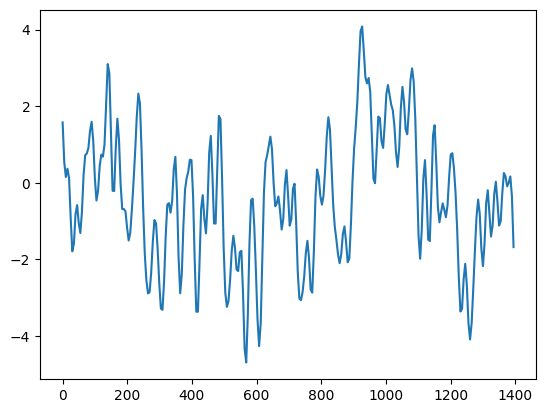

In [12]:
import matplotlib.pyplot as plt
plt.plot(point_to_second(torch.arange(train_set.X[0].shape[1])), train_set.X[0][0])
plt.show()

In [7]:
train_set.X[0].shape

torch.Size([271, 281])

In [6]:
train_set.X.max()
plt.figure(figsize=(10, 6))
plt.boxplot(train_set.X.flatten().numpy())
plt.title("Boxplot of train_set.X")
plt.xlabel("Values")
plt.show()

In [65]:
from sklearn.preprocessing import RobustScaler

class preprocess():
    def cropping(self, meg):
        self.time = torch.arange(meg.shape[-1]) * 1400 / meg.shape[-1]
        self.image_time = torch.where((self.time > 100) & (self.time < 1300))[0]
        return meg[:, :, self.image_time]
    
    def scaler(self, meg):
        scaled_meg = []
        for waves in meg:
            transformer = RobustScaler().fit(waves.T)
            waves_scaled = transformer.transform(waves.T).T
            waves_scaled = torch.tensor(waves_scaled, dtype=torch.float32)
            scaled_meg.append(waves_scaled)
        return torch.stack(scaled_meg)
    
    def clipping(self, meg):
        return torch.clamp(meg, -25, 20)
    
    def preprocess(self, meg):
        meg = self.cropping(meg)
        meg = self.scaler(meg)
        meg = self.clipping(meg)
        return meg

In [67]:
Preprocess = preprocess()
x1 = Preprocess.cropping(val_set.X)
x2 = Preprocess.scaler(x1)

In [78]:
x3 = Preprocess.clipping(x2)

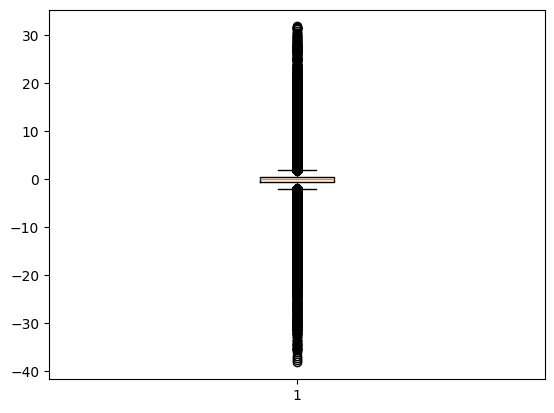

In [75]:
plt.boxplot(x2.flatten().numpy())
plt.show()

In [81]:
val_set.X.shape

torch.Size([16432, 271, 281])

In [82]:
val_set.X = x3
val_set.X.shape

torch.Size([16432, 271, 220])

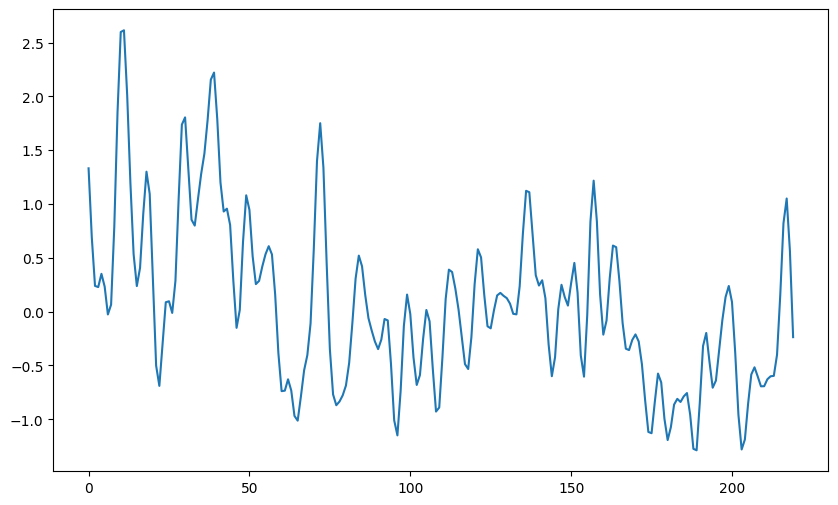

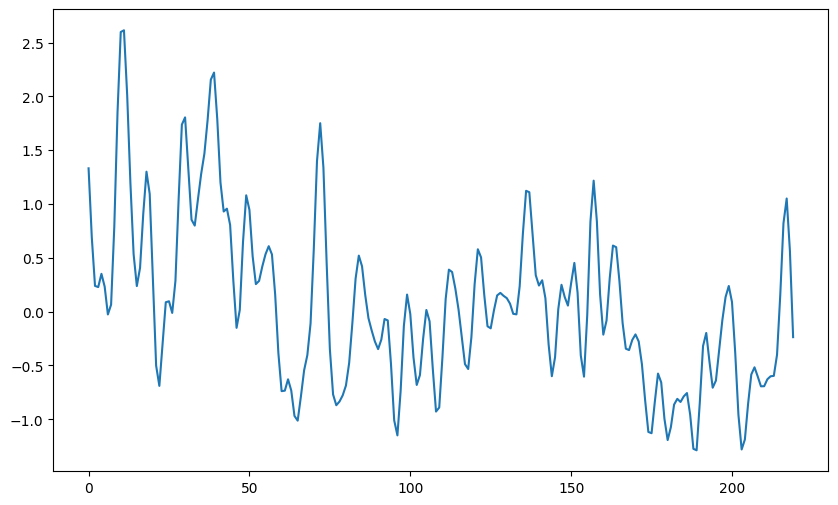

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(x2[0][0])
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(x3[0][0])
plt.show()

In [26]:
train_set.X.shape

torch.Size([65728, 271, 281])